### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측

* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
   지니 지수는 얼마나 불확실한가(얼마나 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미 
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)

iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
creport = classification_report(y_test,pred)

print(f'정확도 : {accuracy:.4f}','\n')
print(f'classification report : \n {creport}')

정확도 : 0.9333 

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



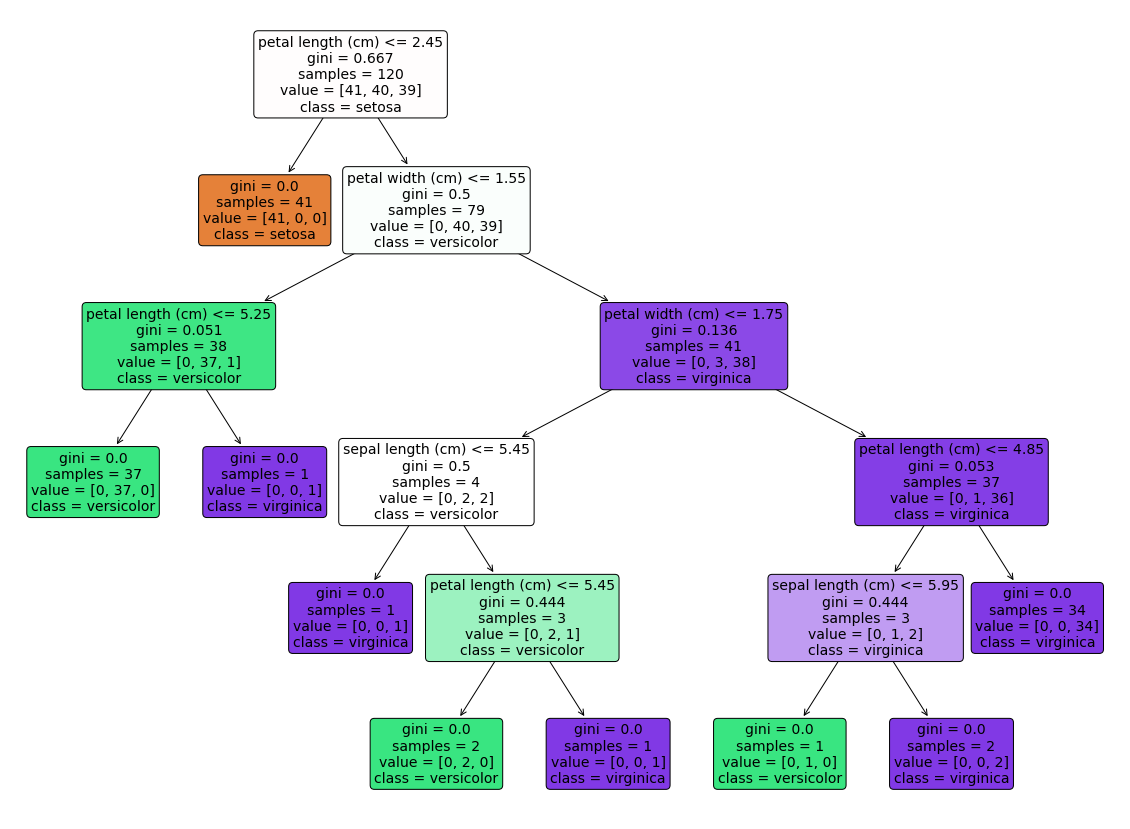

In [2]:
# 시각화

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True, feature_names=iris_data.feature_names,
              class_names=iris_data.target_names, rounded=True, fontsize=14)
plt.show()
plt.close()

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# 요고 돌아가면서 해보기
# dt_clf = DecisionTreeClassifier(random_state=156)
# dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)
# dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)

iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
creport = classification_report(y_test,pred)

print(f'정확도 : {accuracy:.4f}','\n')
print(f'classification report : \n {creport}')

정확도 : 0.8667 

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.80      0.80        10
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



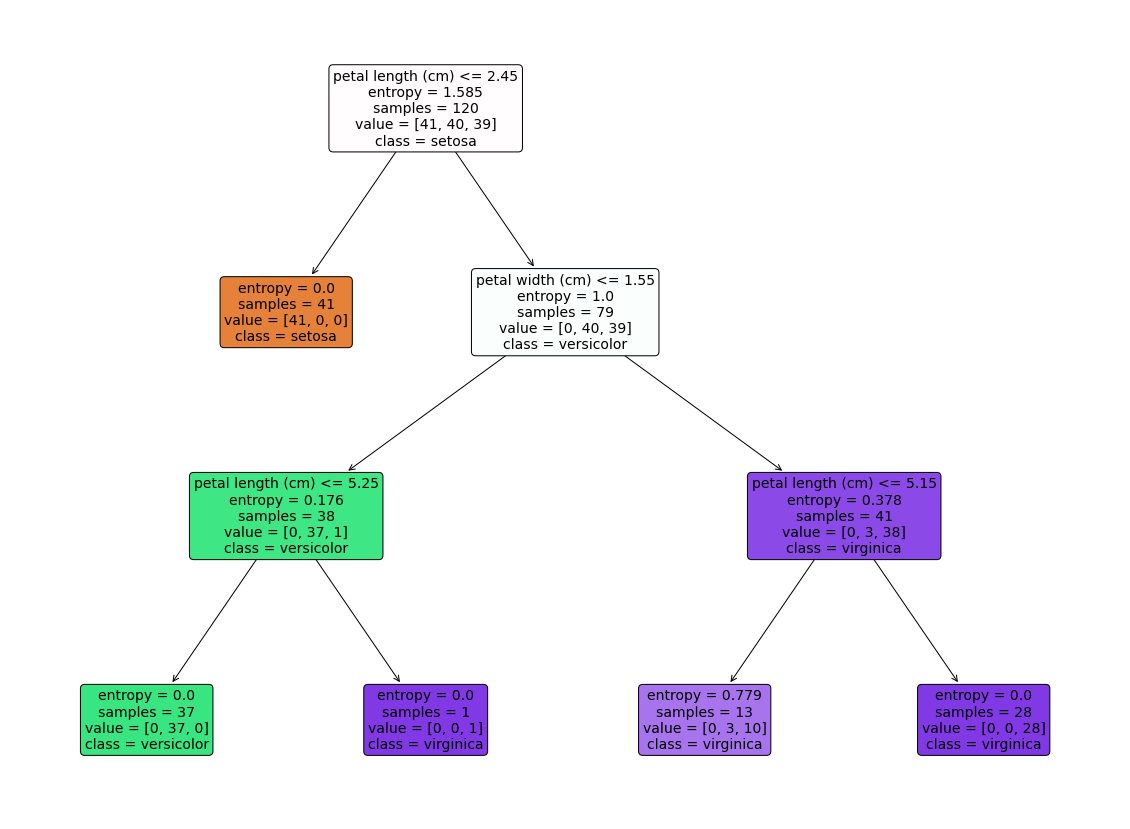

In [43]:
# 시각화

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True, feature_names=iris_data.feature_names,
              class_names=iris_data.target_names, rounded=True, fontsize=14)
plt.show()
plt.close()

Feature Importance : 
 [0.009 0.    0.557 0.435] 

sepal length (cm) : 0.009
sepal width (cm) : 0.000
petal length (cm) : 0.557
petal width (cm) : 0.435



<AxesSubplot:>

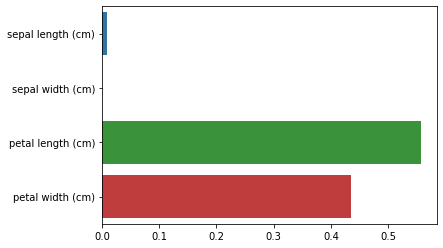

In [17]:
import seaborn as sns
import numpy as np

# feature_importances_ 중요
print(f'Feature Importance : \n {np.round(dt_clf.feature_importances_,3)}','\n')
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')
print()
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

#### 과제_0920_1

### 결정 트리 실습 - Human Activity Recognition
'dataset/human_activity' 폴더의 데이터들을 불러와서 다음을 수행하세요.
- 학습용 평가용 데이터셋 추출
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화


In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

feature_name_df = pd.read_csv('human_activity/features.txt',sep='\s+', header=None,
                             names=['column_index','column_name'])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [24]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [27]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                             if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [29]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당
    feature_name_df = pd.read_csv('human_activity/features.txt',sep='\s+',
                                 header=None, names=['column_index','column_name'])
    # 신규 피처명 DF 생성 - 중복된 피처명 수정
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DF에 피처명 컬럼으로 부여 - 리스트로 반환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터 세트, 테스트 피처 데이터를 DF로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DF로 로딩하고 컬럼명 action 으로 부여
    y_train = pd.read_csv('human_activity/train/y_train.txt',sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DF를 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [30]:
print('-- 학습 피처 데이터 셋 info() --')
print(X_train.info())

-- 학습 피처 데이터 셋 info() --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [31]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(f'결정 트리 예측 정확도 : {accuracy:.4f}')

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [33]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_:.4f}')
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [34]:
# GridSearchCV 객페의 cv_results_ 속성을 DF로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [36]:
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값 변화 시키면서 학습과 테스트 세트에서의 예측 성능 측정

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print(f'max_depth={depth}  정확도 : {accuracy:.4f}')

max_depth=6  정확도 : 0.8551
max_depth=8  정확도 : 0.8717
max_depth=10  정확도 : 0.8599
max_depth=12  정확도 : 0.8571
max_depth=16  정확도 : 0.8599
max_depth=20  정확도 : 0.8565
max_depth=24  정확도 : 0.8565


In [38]:
params = {'max_depth' : [8, 12, 16, 20],
         'min_samples_split' : [16, 24],}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치 {grid_cv.best_score_ : .4f}')
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치  0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [39]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print(f'결정 트리 예측 정확도 : {accuracy:.4f}')

결정 트리 예측 정확도 : 0.8717


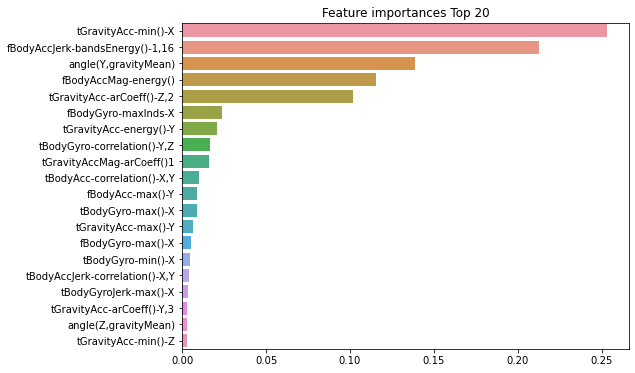

In [41]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게, Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()